In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/01_Jan.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.500000,77.000000,1,1,0,1549.0,1613.0,1699.0,1511.0,1495.0,1376.0,124.166667,1490.0
1,13.441667,78.083333,1,1,0,1521.0,1629.0,1662.0,1487.0,1454.0,1248.0,245.333333,1454.0
2,13.383333,79.166667,1,1,0,1526.0,1618.0,1644.0,1476.0,1429.0,1205.0,366.250000,1451.0
3,13.325000,80.250000,1,1,0,1519.0,1588.0,1621.0,1450.0,1271.0,1183.0,483.416667,1406.0
4,13.266667,81.333333,2,1,0,1490.0,1549.0,1613.0,1420.0,1282.0,1150.0,601.250000,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,11.412452,84.203770,23,4,1,1925.0,1956.0,2072.0,1832.0,1849.0,1620.0,1936.500000,1787.0
8636,11.412452,84.203770,24,4,1,1904.0,1948.0,2046.0,1793.0,1817.0,1587.0,1913.833333,1774.0
8637,11.412452,84.203770,24,4,1,1877.0,1947.0,2016.0,1730.0,1771.0,1562.0,1891.416667,1747.0
8638,11.312452,84.203770,24,4,1,1871.0,1977.0,1984.0,1702.0,1716.0,1517.0,1867.833333,1701.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,-0.876373,-1.326237,-6.161528
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,-1.029162,-1.798292,-5.696933
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,-1.122326,-1.956873,-5.233296
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,-1.711123,-2.038008,-4.784038
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,-1.670131,-2.159709,-4.332224


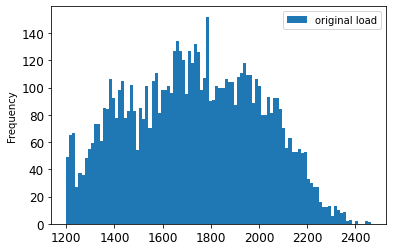

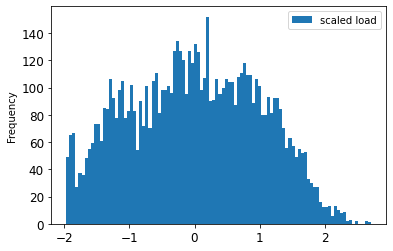

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

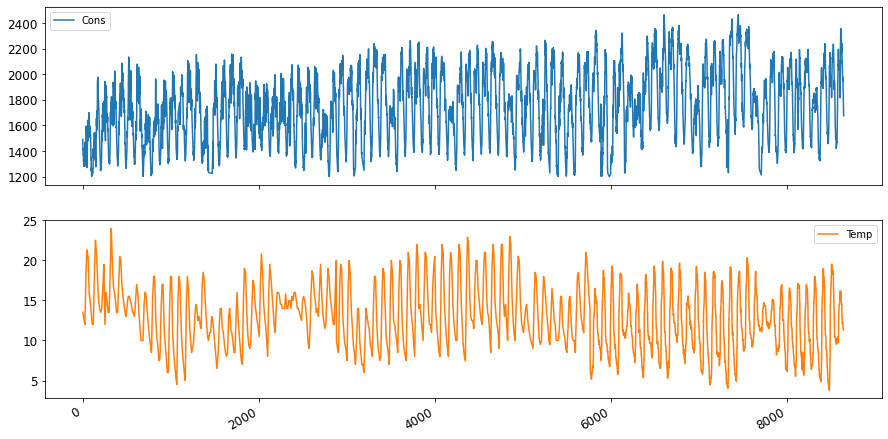

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,-0.876373,-1.326237,-6.161528,-1.804048
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,-1.029162,-1.798292,-5.696933,-1.962858
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,-1.122326,-1.956873,-5.233296,-1.959165
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,-1.711123,-2.038008,-4.784038,-1.952042
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,-1.670131,-2.159709,-4.332224,-1.944919
5,-1.327617,-0.023482,0.622727,-1.516446,-1.445126,-1.372959,-1.027869,-0.779643,-0.380035,-1.329723,-1.409272,-2.141270,-3.893510,-1.937796
6,-1.323924,-0.038868,0.687688,-1.516446,-1.445126,-1.372959,-1.038946,-0.761185,-0.420638,-1.437429,-1.442811,-2.045384,-3.454477,-1.930674
7,-1.390402,-0.054254,0.752648,-1.516446,-1.445126,-1.372959,-1.205099,-0.787027,-0.531373,-1.530278,-1.509889,-2.167085,-3.021196,-1.923551
8,-1.456881,-0.069641,0.817608,-1.372000,-1.445126,-1.372959,-1.175560,-0.894084,-0.675329,-1.444857,-1.576967,-2.174461,-2.593666,-1.916428
9,-1.519667,-0.085027,0.882569,-1.372000,-1.445126,-1.372959,-1.326944,-1.026983,-0.778681,-1.519136,-1.617959,-1.613896,-2.171568,-1.909306


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.895505,0.053450,0.297926,-1.660891,-1.445126,-1.372959,-0.677102,-0.440014,-0.121653,-0.809766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.895505
1,-1.028463,0.038063,0.362886,-1.660891,-1.445126,-1.372959,-0.780486,-0.380947,-0.258227,-0.898901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.895505,-1.028463
2,-1.039543,0.022677,0.427846,-1.660891,-1.445126,-1.372959,-0.762025,-0.421555,-0.324668,-0.939755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.895505,-1.028463,-1.039543
3,-1.205739,0.007291,0.492807,-1.660891,-1.445126,-1.372959,-0.787871,-0.532304,-0.409564,-1.036319,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.895505,-1.028463,-1.039543,-1.205739
4,-1.176193,-0.008095,0.557767,-1.516446,-1.445126,-1.372959,-0.894947,-0.676278,-0.439094,-1.147738,...,NaN,NaN,NaN,NaN,NaN,-0.895505,-1.028463,-1.039543,-1.205739,-1.176193
5,-1.327617,-0.023482,0.622727,-1.516446,-1.445126,-1.372959,-1.027869,-0.779643,-0.380035,-1.329723,...,NaN,NaN,NaN,NaN,-0.895505,-1.028463,-1.039543,-1.205739,-1.176193,-1.327617
6,-1.323924,-0.038868,0.687688,-1.516446,-1.445126,-1.372959,-1.038946,-0.761185,-0.420638,-1.437429,...,NaN,NaN,NaN,-0.895505,-1.028463,-1.039543,-1.205739,-1.176193,-1.327617,-1.323924
7,-1.390402,-0.054254,0.752648,-1.516446,-1.445126,-1.372959,-1.205099,-0.787027,-0.531373,-1.530278,...,NaN,NaN,-0.895505,-1.028463,-1.039543,-1.205739,-1.176193,-1.327617,-1.323924,-1.390402
8,-1.456881,-0.069641,0.817608,-1.372000,-1.445126,-1.372959,-1.175560,-0.894084,-0.675329,-1.444857,...,NaN,-0.895505,-1.028463,-1.039543,-1.205739,-1.176193,-1.327617,-1.323924,-1.390402,-1.456881
9,-1.519667,-0.085027,0.882569,-1.372000,-1.445126,-1.372959,-1.326944,-1.026983,-0.778681,-1.519136,...,-0.895505,-1.028463,-1.039543,-1.205739,-1.176193,-1.327617,-1.323924,-1.390402,-1.456881,-1.519667


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.486427,-0.100413,0.947529,-1.372000,-1.445126,-1.372959,-1.323252,-1.038058,-0.760226,-1.500566,...,-1.028463,-1.039543,-1.205739,-1.176193,-1.327617,-1.323924,-1.390402,-1.456881,-1.519667,-1.486427
11,-1.552906,-0.115800,1.012490,-1.372000,-1.445126,-1.372959,-1.389713,-1.204181,-0.786064,-1.585988,...,-1.039543,-1.205739,-1.176193,-1.327617,-1.323924,-1.390402,-1.456881,-1.519667,-1.486427,-1.552906
12,-1.615691,-0.131186,1.077450,-1.227555,-1.445126,-1.372959,-1.456174,-1.174648,-0.893108,-1.634270,...,-1.205739,-1.176193,-1.327617,-1.323924,-1.390402,-1.456881,-1.519667,-1.486427,-1.552906,-1.615691
13,-1.660010,-0.148770,1.067456,-1.227555,-1.445126,-1.372959,-1.518942,-1.326005,-1.025990,-1.719691,...,-1.176193,-1.327617,-1.323924,-1.390402,-1.456881,-1.519667,-1.486427,-1.552906,-1.615691,-1.660010
14,-1.634158,-0.166354,1.057462,-1.227555,-1.445126,-1.372959,-1.485712,-1.322313,-1.037063,-1.567418,...,-1.327617,-1.323924,-1.390402,-1.456881,-1.519667,-1.486427,-1.552906,-1.615691,-1.660010,-1.634158


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 10 to 7100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7091 non-null   float64
 1   Temp           7091 non-null   float64
 2   Hum            7091 non-null   float64
 3   A              7091 non-null   float64
 4   B              7091 non-null   float64
 5   C              7091 non-null   float64
 6   D              7091 non-null   float64
 7   E              7091 non-null   float64
 8   F              7091 non-null   float64
 9   G              7091 non-null   float64
 10  H              7091 non-null   float64
 11  I              7091 non-null   float64
 12  J              7091 non-null   float64
 13  y_t+100        7091 non-null   float64
 14  Cons_t-10      7091 non-null   float64
 15  Cons_t-9       7091 non-null   float64
 16  Cons_t-8       7091 non-null   float64
 17  Cons_t-7       7091 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.902183
11,-1.895060
12,-1.887937
13,-1.880815
14,-1.873692
...,...
7096,0.371283
7097,0.227246
7098,-0.064522
7099,-0.156853


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.486427,-1.486427,-1.519667,-1.456881,-1.390402,-1.323924,-1.327617,-1.176193,-1.205739,-1.039543,...,-1.372000,-1.445126,-1.372959,-1.323252,-1.038058,-0.760226,-1.500566,-1.692490,-1.768789,-1.746594
11,-1.552906,-1.552906,-1.486427,-1.519667,-1.456881,-1.390402,-1.323924,-1.327617,-1.176193,-1.205739,...,-1.372000,-1.445126,-1.372959,-1.389713,-1.204181,-0.786064,-1.585988,-2.434076,-1.772477,-1.327372
12,-1.615691,-1.615691,-1.552906,-1.486427,-1.519667,-1.456881,-1.390402,-1.323924,-1.327617,-1.176193,...,-1.227555,-1.445126,-1.372959,-1.456174,-1.174648,-0.893108,-1.634270,-2.407990,-1.783541,-1.389680
13,-1.660010,-1.660010,-1.615691,-1.552906,-1.486427,-1.519667,-1.456881,-1.390402,-1.323924,-1.327617,...,-1.227555,-1.445126,-1.372959,-1.518942,-1.326005,-1.025990,-1.719691,-2.217935,-1.772477,-1.444320
14,-1.634158,-1.634158,-1.660010,-1.615691,-1.552906,-1.486427,-1.519667,-1.456881,-1.390402,-1.323924,...,-1.227555,-1.445126,-1.372959,-1.485712,-1.322313,-1.037063,-1.567418,-2.229115,-1.816732,-1.495764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,0.773849,0.773849,0.866180,0.917886,0.829248,0.840327,0.895726,0.866180,1.209654,1.320451,...,1.516907,-0.943349,0.728354,0.840425,1.320894,1.723931,-0.189531,0.301220,0.576735,1.131085
7097,0.585492,0.585492,0.773849,0.866180,0.917886,0.829248,0.840327,0.895726,0.866180,1.209654,...,1.516907,-0.943349,0.728354,0.829348,1.210145,1.568902,-0.267525,0.260228,0.488225,1.046090
7098,0.537480,0.537480,0.585492,0.773849,0.866180,0.917886,0.829248,0.840327,0.895726,0.866180,...,1.516907,-0.943349,0.728354,0.917963,0.866824,1.531991,-0.326020,0.226689,0.539856,0.960137
7099,0.426682,0.426682,0.537480,0.585492,0.773849,0.866180,0.917886,0.829248,0.840327,0.895726,...,1.516907,-0.943349,0.728354,0.866271,0.896357,1.395417,-0.384515,0.178244,0.296452,0.876420


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7091,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1618.0,8.322452,74.75315,1.0,4.0,1.0,1794.0,1909.0,1954.0,1617.0,1463.0,1550.0,1817.250000
7202,1585.0,8.462452,74.25769,1.0,4.0,1.0,1715.0,1874.0,1991.0,1599.0,1437.0,1535.0,1783.416667
7203,1584.0,8.602452,73.76223,1.0,4.0,1.0,1690.0,1856.0,1943.0,1559.0,1408.0,1514.0,1753.500000
7204,1553.0,8.602452,73.76223,2.0,4.0,1.0,1646.0,1833.0,1938.0,1553.0,1356.0,1488.0,1721.416667
7205,1521.0,8.602452,73.76223,2.0,4.0,1.0,1618.0,1794.0,1909.0,1518.0,1367.0,1478.0,1689.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,1739.0,8.272452,88.70196,24.0,6.0,1.0,1848.0,1936.0,2010.0,1674.0,1723.0,1418.0,1879.916667
8158,1677.0,8.002452,88.70196,24.0,6.0,1.0,1855.0,1928.0,1976.0,1651.0,1666.0,1396.0,1855.000000
8159,1646.0,8.002452,89.59910,24.0,6.0,1.0,1827.0,1920.0,1950.0,1604.0,1629.0,1432.0,1829.666667
8160,1623.0,8.002452,89.59910,1.0,7.0,0.0,1778.0,1881.0,1921.0,1603.0,1568.0,1431.0,1804.833333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,-1.281010,-0.958048,-0.107112
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,-1.365096,-1.006847,-0.224316
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,-1.458885,-1.075164,-0.327953
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,-1.627056,-1.159749,-0.439094
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,-1.591482,-1.192281,-0.551102
7206,-1.078826,-0.967222,-0.320583,-1.513750,-0.170444,0.657412,-0.874472,-0.443313,0.084382,-1.107914,-1.688504,-1.192281,-0.652429
7207,-1.078826,-1.044672,-0.316191,-1.513750,-0.170444,0.657412,-0.877796,-0.526422,0.024556,-1.091419,-1.759654,-1.234573,-0.748559
7208,-1.082149,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-0.980844,-0.672694,-0.051889,-1.140904,-1.801697,-1.341930,-0.838339
7209,-1.161880,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-1.087215,-0.765776,-0.181512,-1.239873,-1.811399,-1.348436,-0.923788
7210,-1.211711,-1.020635,-0.212206,-1.369419,-0.170444,0.657412,-1.080567,-0.875480,-0.444083,-1.414720,-1.791994,-1.387475,-0.990762


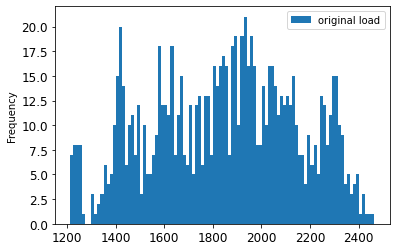

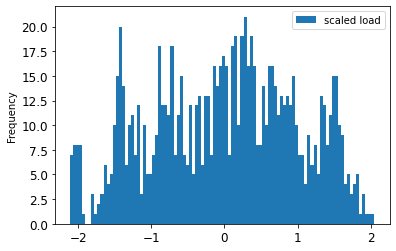

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,-1.281010,-0.958048,-0.107112,-0.700104
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,-1.365096,-1.006847,-0.224316,-0.720037
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,-1.458885,-1.075164,-0.327953,-0.799768
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,-1.627056,-1.159749,-0.439094,-0.816379
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,-1.591482,-1.192281,-0.551102,-0.842956
7206,-1.078826,-0.967222,-0.320583,-1.513750,-0.170444,0.657412,-0.874472,-0.443313,0.084382,-1.107914,-1.688504,-1.192281,-0.652429,-1.028995
7207,-1.078826,-1.044672,-0.316191,-1.513750,-0.170444,0.657412,-0.877796,-0.526422,0.024556,-1.091419,-1.759654,-1.234573,-0.748559,-0.945941
7208,-1.082149,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-0.980844,-0.672694,-0.051889,-1.140904,-1.801697,-1.341930,-0.838339,-0.975841
7209,-1.161880,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-1.087215,-0.765776,-0.181512,-1.239873,-1.811399,-1.348436,-0.923788,-0.985807
7210,-1.211711,-1.020635,-0.212206,-1.369419,-0.170444,0.657412,-1.080567,-0.875480,-0.444083,-1.414720,-1.791994,-1.387475,-0.990762,-0.932653


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,-0.763225,-0.964551,-0.266810,-1.658081,-0.170444,0.657412,-0.179731,0.201613,0.350276,-0.794510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.763225
7202,-0.872855,-0.927161,-0.295892,-1.658081,-0.170444,0.657412,-0.442336,0.085261,0.473252,-0.853892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.763225,-0.872855
7203,-0.876177,-0.889771,-0.324974,-1.658081,-0.170444,0.657412,-0.525439,0.025422,0.313716,-0.985851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.763225,-0.872855,-0.876177
7204,-0.979163,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.671700,-0.051038,0.297097,-1.005645,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.763225,-0.872855,-0.876177,-0.979163
7205,-1.085471,-0.889771,-0.324974,-1.513750,-0.170444,0.657412,-0.764776,-0.180688,0.200711,-1.121110,...,NaN,NaN,NaN,NaN,NaN,-0.763225,-0.872855,-0.876177,-0.979163,-1.085471
7206,-1.078826,-0.967222,-0.320583,-1.513750,-0.170444,0.657412,-0.874472,-0.443313,0.084382,-1.107914,...,NaN,NaN,NaN,NaN,-0.763225,-0.872855,-0.876177,-0.979163,-1.085471,-1.078826
7207,-1.078826,-1.044672,-0.316191,-1.513750,-0.170444,0.657412,-0.877796,-0.526422,0.024556,-1.091419,...,NaN,NaN,NaN,-0.763225,-0.872855,-0.876177,-0.979163,-1.085471,-1.078826,-1.078826
7208,-1.082149,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-0.980844,-0.672694,-0.051889,-1.140904,...,NaN,NaN,-0.763225,-0.872855,-0.876177,-0.979163,-1.085471,-1.078826,-1.078826,-1.082149
7209,-1.161880,-1.044672,-0.316191,-1.369419,-0.170444,0.657412,-1.087215,-0.765776,-0.181512,-1.239873,...,NaN,-0.763225,-0.872855,-0.876177,-0.979163,-1.085471,-1.078826,-1.078826,-1.082149,-1.161880
7210,-1.211711,-1.020635,-0.212206,-1.369419,-0.170444,0.657412,-1.080567,-0.875480,-0.444083,-1.414720,...,-0.763225,-0.872855,-0.876177,-0.979163,-1.085471,-1.078826,-1.078826,-1.082149,-1.161880,-1.211711


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7211,-1.218356,-0.996599,-0.108221,-1.369419,-0.170444,0.657412,-1.080567,-0.878804,-0.527174,-1.249770,...,-0.872855,-0.876177,-0.979163,-1.085471,-1.078826,-1.078826,-1.082149,-1.161880,-1.211711,-1.218356
7212,-1.364529,-0.996599,-0.108221,-1.225087,-0.170444,0.657412,-1.083891,-0.981860,-0.673416,-1.266265,...,-0.876177,-0.979163,-1.085471,-1.078826,-1.078826,-1.082149,-1.161880,-1.211711,-1.218356,-1.364529
7213,-1.251577,-0.996599,-0.108221,-1.225087,-0.170444,0.657412,-1.163670,-1.088239,-0.766479,-1.299255,...,-0.979163,-1.085471,-1.078826,-1.078826,-1.082149,-1.161880,-1.211711,-1.218356,-1.364529,-1.251577
7214,-1.264865,-0.967222,-0.115072,-1.225087,-0.170444,0.657412,-1.213532,-1.081590,-0.876161,-1.269564,...,-1.085471,-1.078826,-1.078826,-1.082149,-1.161880,-1.211711,-1.218356,-1.364529,-1.251577,-1.264865
7215,-1.244933,-0.937844,-0.121923,-1.225087,-0.170444,0.657412,-1.220180,-1.081590,-0.879484,-1.279461,...,-1.078826,-1.078826,-1.082149,-1.161880,-1.211711,-1.218356,-1.364529,-1.251577,-1.264865,-1.244933


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,-1.909358
7212,-1.617011
7213,-1.324664
7214,-1.291442
7215,-1.294765
...,...
8057,-0.361247
8058,-0.567219
8059,-0.670205
8060,-0.746614


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7211,-1.218356,-1.218356,-1.211711,-1.161880,-1.082149,-1.078826,-1.078826,-1.085471,-0.979163,-0.876177,...,-1.369419,-0.170444,0.657412,-1.080567,-0.878804,-0.527174,-1.249770,-1.817867,-1.429767,-1.051096
7212,-1.364529,-1.364529,-1.218356,-1.211711,-1.161880,-1.082149,-1.078826,-1.078826,-1.085471,-0.979163,...,-1.225087,-0.170444,0.657412,-1.083891,-0.981860,-0.673416,-1.266265,-1.882548,-1.507844,-1.111430
7213,-1.251577,-1.251577,-1.364529,-1.218356,-1.211711,-1.161880,-1.082149,-1.078826,-1.078826,-1.085471,...,-1.225087,-0.170444,0.657412,-1.163670,-1.088239,-0.766479,-1.299255,-1.859910,-1.491578,-1.153866
7214,-1.264865,-1.264865,-1.251577,-1.364529,-1.218356,-1.211711,-1.161880,-1.082149,-1.078826,-1.078826,...,-1.225087,-0.170444,0.657412,-1.213532,-1.081590,-0.876161,-1.269564,-1.837271,-1.462299,-1.187930
7215,-1.244933,-1.244933,-1.264865,-1.251577,-1.364529,-1.218356,-1.211711,-1.161880,-1.082149,-1.078826,...,-1.225087,-0.170444,0.657412,-1.220180,-1.081590,-0.879484,-1.279461,-1.840505,-1.488325,-1.219974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.073951,0.073951,0.157004,0.236735,0.303178,0.283245,0.240057,0.303178,0.422774,0.545693,...,1.517204,0.386687,0.657412,0.282322,0.544023,0.865446,-0.048939,-1.086966,-0.349694,0.416842
8058,-0.032357,-0.032357,0.073951,0.157004,0.236735,0.303178,0.283245,0.240057,0.303178,0.422774,...,1.517204,0.386687,0.657412,0.302267,0.421021,0.895359,-0.075331,-1.112838,-0.385479,0.336012
8059,-0.168564,-0.168564,-0.032357,0.073951,0.157004,0.236735,0.303178,0.283245,0.240057,0.303178,...,1.517204,0.386687,0.657412,0.235784,0.301344,0.722528,-0.167703,-1.242201,-0.515609,0.258357
8060,-0.324704,-0.324704,-0.168564,-0.032357,0.073951,0.157004,0.236735,0.303178,0.283245,0.240057,...,1.661535,0.386687,0.657412,0.156005,0.238181,0.622818,-0.302961,-1.439480,-0.701043,0.175794


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(100,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               91600     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 109,877
Trainable params: 109,877
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
24/24 [==============================] - 1s 30ms/step - loss: 0.9145 - val_loss: 0.9046
Epoch 2/300
24/24 [==============================] - 0s 15ms/step - loss: 0.8027 - val_loss: 0.8175
Epoch 3/300
24/24 [==============================] - 0s 16ms/step - loss: 0.7053 - val_loss: 0.7474
Epoch 4/300
24/24 [==============================] - 0s 18ms/step - loss: 0.6255 - val_loss: 0.7033
Epoch 5/300
24/24 [==============================] - 0s 15ms/step - loss: 0.5718 - val_loss: 0.6763
Epoch 6/300
24/24 [==============================] - 0s 15ms/step - loss: 0.5359 - val_loss: 0.6477
Epoch 7/300
24/24 [==============================] - 0s 15ms/step - loss: 0.5027 - val_loss: 0.6119
Epoch 8/300
24/24 [==============================] - 0s 15ms/step - loss: 0.4691 - val_loss: 0.5776
Epoch 9/300
24/24 [==============================] - 0s 15ms/step - loss: 0.4356 - val_loss: 0.5433
Epoch 10/300
24/24 [==============================] - 0s 15ms/step - loss: 0.4034 - val_loss: 0.5118

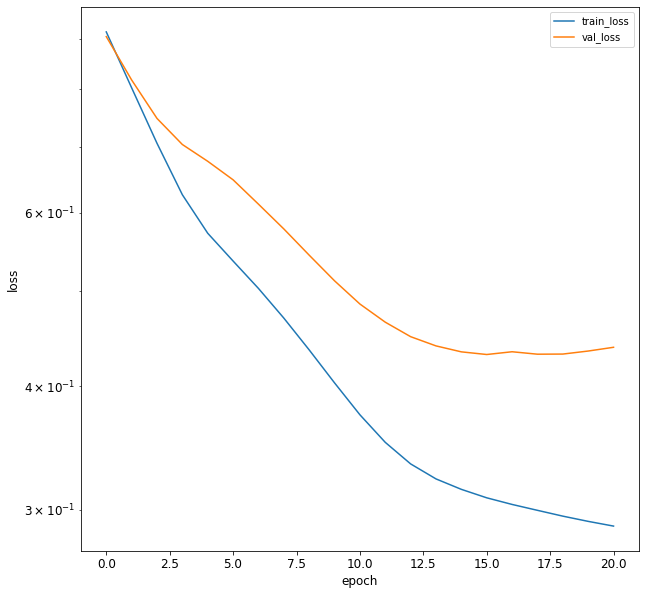

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,1579.0,7.357452,91.902145,1.0,7.0,0.0,1677.0,1855.0,1928.0,1524.0,1543.0,1407.0,1746.333333
8163,1559.0,6.712452,94.205190,1.0,7.0,0.0,1646.0,1827.0,1920.0,1527.0,1521.0,1417.0,1716.250000
8164,1543.0,6.712452,94.205190,2.0,7.0,0.0,1623.0,1778.0,1881.0,1495.0,1494.0,1416.0,1688.083333
8165,1515.0,6.712452,94.205190,2.0,7.0,0.0,1583.0,1739.0,1848.0,1496.0,1480.0,1390.0,1660.333333
8166,1515.0,6.537452,94.688372,2.0,7.0,0.0,1579.0,1677.0,1855.0,1476.0,1457.0,1375.0,1632.000000
8167,1497.0,6.362452,95.171555,2.0,7.0,0.0,1559.0,1646.0,1827.0,1484.0,1456.0,1375.0,1604.500000
8168,1483.0,6.362452,95.171555,3.0,7.0,0.0,1543.0,1623.0,1778.0,1470.0,1433.0,1363.0,1579.916667
8169,1465.0,6.362452,95.171555,3.0,7.0,0.0,1515.0,1583.0,1739.0,1455.0,1417.0,1351.0,1557.083333
8170,1452.0,7.447452,88.419252,3.0,7.0,0.0,1515.0,1579.0,1677.0,1443.0,1403.0,1350.0,1538.333333
8171,1447.0,8.532452,81.666950,3.0,7.0,0.0,1497.0,1559.0,1646.0,1421.0,1413.0,1348.0,1521.750000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


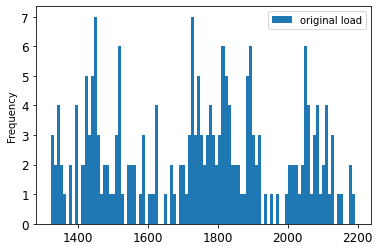

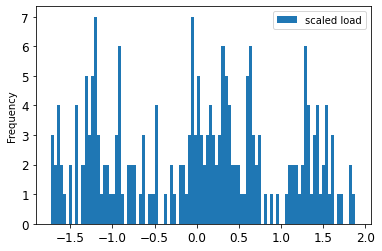

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-0.664559,-0.804090,1.262235,-1.498364,1.114783,-0.340279,-0.285066,0.442591,0.735589,-1.094484,-0.964711,-1.388478,-0.009991,-0.917066
8163,-0.747348,-0.963314,1.388479,-1.498364,1.114783,-0.340279,-0.416058,0.320746,0.699752,-1.082509,-1.052884,-1.351080,-0.143970,-0.925345
8164,-0.813580,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.513246,0.107518,0.525046,-1.210243,-1.161098,-1.354820,-0.269413,-0.962600
8165,-0.929485,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.682268,-0.062195,0.377219,-1.206252,-1.217208,-1.452055,-0.393000,-1.082645
8166,-0.929485,-1.006514,1.414966,-1.357685,1.114783,-0.340279,-0.699170,-0.331995,0.408576,-1.286086,-1.309390,-1.508153,-0.519185,-1.169573
8167,-1.003995,-1.049714,1.441452,-1.357685,1.114783,-0.340279,-0.783682,-0.466895,0.283146,-1.254152,-1.313397,-1.508153,-0.641659,-1.239944
8168,-1.061947,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.851290,-0.566982,0.063645,-1.310036,-1.405579,-1.553030,-0.751144,-1.252363
8169,-1.136458,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.969606,-0.741046,-0.111061,-1.369912,-1.469705,-1.597908,-0.852834,-1.244084
8170,-1.190271,-0.781873,1.071315,-1.217006,1.114783,-0.340279,-0.969606,-0.758452,-0.388798,-1.417813,-1.525816,-1.601648,-0.936339,-1.227526
8171,-1.210968,-0.514031,0.701178,-1.217006,1.114783,-0.340279,-1.045666,-0.845485,-0.527666,-1.505631,-1.485737,-1.609128,-1.010194,-1.202689


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,-0.664559,-0.804090,1.262235,-1.498364,1.114783,-0.340279,-0.285066,0.442591,0.735589,-1.094484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.664559
8163,-0.747348,-0.963314,1.388479,-1.498364,1.114783,-0.340279,-0.416058,0.320746,0.699752,-1.082509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.664559,-0.747348
8164,-0.813580,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.513246,0.107518,0.525046,-1.210243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.664559,-0.747348,-0.813580
8165,-0.929485,-0.963314,1.388479,-1.357685,1.114783,-0.340279,-0.682268,-0.062195,0.377219,-1.206252,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.664559,-0.747348,-0.813580,-0.929485
8166,-0.929485,-1.006514,1.414966,-1.357685,1.114783,-0.340279,-0.699170,-0.331995,0.408576,-1.286086,...,NaN,NaN,NaN,NaN,NaN,-0.664559,-0.747348,-0.813580,-0.929485,-0.929485
8167,-1.003995,-1.049714,1.441452,-1.357685,1.114783,-0.340279,-0.783682,-0.466895,0.283146,-1.254152,...,NaN,NaN,NaN,NaN,-0.664559,-0.747348,-0.813580,-0.929485,-0.929485,-1.003995
8168,-1.061947,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.851290,-0.566982,0.063645,-1.310036,...,NaN,NaN,NaN,-0.664559,-0.747348,-0.813580,-0.929485,-0.929485,-1.003995,-1.061947
8169,-1.136458,-1.049714,1.441452,-1.217006,1.114783,-0.340279,-0.969606,-0.741046,-0.111061,-1.369912,...,NaN,NaN,-0.664559,-0.747348,-0.813580,-0.929485,-0.929485,-1.003995,-1.061947,-1.136458
8170,-1.190271,-0.781873,1.071315,-1.217006,1.114783,-0.340279,-0.969606,-0.758452,-0.388798,-1.417813,...,NaN,-0.664559,-0.747348,-0.813580,-0.929485,-0.929485,-1.003995,-1.061947,-1.136458,-1.190271
8171,-1.210968,-0.514031,0.701178,-1.217006,1.114783,-0.340279,-1.045666,-0.845485,-0.527666,-1.505631,...,-0.664559,-0.747348,-0.813580,-0.929485,-0.929485,-1.003995,-1.061947,-1.136458,-1.190271,-1.210968


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8172,-1.277199,-0.514031,0.701178,-1.076327,1.114783,-0.340279,-1.104824,-0.915110,-0.630698,-1.529581,...,-0.747348,-0.813580,-0.929485,-0.929485,-1.003995,-1.061947,-1.136458,-1.190271,-1.210968,-1.277199
8173,-1.302036,-0.514031,0.701178,-1.076327,1.114783,-0.340279,-1.180884,-1.036955,-0.809883,-1.645341,...,-0.813580,-0.929485,-0.929485,-1.003995,-1.061947,-1.136458,-1.190271,-1.210968,-1.277199,-1.302036
8174,-1.268921,-0.731267,0.895134,-1.076327,1.114783,-0.340279,-1.235816,-1.036955,-0.827802,-1.525589,...,-0.929485,-0.929485,-1.003995,-1.061947,-1.136458,-1.190271,-1.210968,-1.277199,-1.302036,-1.268921
8175,-1.306176,-0.948502,1.089091,-1.076327,1.114783,-0.340279,-1.256944,-1.115284,-0.917394,-1.521597,...,-0.929485,-1.003995,-1.061947,-1.136458,-1.190271,-1.210968,-1.277199,-1.302036,-1.268921,-1.306176
8176,-1.339291,-0.948502,1.089091,-0.935648,1.114783,-0.340279,-1.324553,-1.176207,-0.989068,-1.521597,...,-1.003995,-1.061947,-1.136458,-1.190271,-1.210968,-1.277199,-1.302036,-1.268921,-1.306176,-1.339291


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-1.194410
8173,-1.244084
8174,-1.302036
8175,-1.153016
8176,-1.103342
...,...
8269,-1.699424
8270,-1.641472
8271,-1.600077
8272,-1.496591


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8172,-1.277199,-1.277199,-1.210968,-1.190271,-1.136458,-1.061947,-1.003995,-0.929485,-0.929485,-0.813580,...,-1.076327,1.114783,-0.340279,-1.104824,-0.915110,-0.630698,-1.529581,-1.569902,-1.665225,-1.081452
8173,-1.302036,-1.302036,-1.277199,-1.210968,-1.190271,-1.136458,-1.061947,-1.003995,-0.929485,-0.929485,...,-1.076327,1.114783,-0.340279,-1.180884,-1.036955,-0.809883,-1.645341,-1.561887,-1.683924,-1.140091
8174,-1.268921,-1.268921,-1.302036,-1.277199,-1.210968,-1.190271,-1.136458,-1.061947,-1.003995,-0.929485,...,-1.076327,1.114783,-0.340279,-1.235816,-1.036955,-0.827802,-1.525589,-1.533831,-1.777419,-1.194276
8175,-1.306176,-1.306176,-1.268921,-1.302036,-1.277199,-1.210968,-1.190271,-1.136458,-1.061947,-1.003995,...,-1.076327,1.114783,-0.340279,-1.256944,-1.115284,-0.917394,-1.521597,-1.557879,-1.751241,-1.244379
8176,-1.339291,-1.339291,-1.306176,-1.268921,-1.302036,-1.277199,-1.210968,-1.190271,-1.136458,-1.061947,...,-0.935648,1.114783,-0.340279,-1.324553,-1.176207,-0.989068,-1.521597,-1.517800,-1.728802,-1.291513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.244084,-1.244084,-1.252363,-1.239944,-1.169573,-1.082645,-0.962600,-0.925345,-0.917066,-0.946043,...,-1.076327,-0.952278,-0.340279,-1.125952,-1.054362,-0.671015,-1.489664,-1.593950,-1.437096,-1.117452
8270,-1.227526,-1.227526,-1.244084,-1.252363,-1.239944,-1.169573,-1.082645,-0.962600,-0.925345,-0.917066,...,-1.076327,-0.952278,-0.340279,-1.214688,-1.023900,-0.805403,-1.457730,-1.473713,-1.410917,-1.169782
8271,-1.202689,-1.202689,-1.227526,-1.244084,-1.252363,-1.239944,-1.169573,-1.082645,-0.962600,-0.925345,...,-1.076327,-0.952278,-0.340279,-1.286523,-1.032604,-0.930833,-1.493655,-1.469705,-1.433356,-1.209493
8272,-1.194410,-1.194410,-1.202689,-1.227526,-1.244084,-1.252363,-1.239944,-1.169573,-1.082645,-0.962600,...,-0.935648,-0.952278,-0.340279,-1.299200,-1.071768,-1.051783,-1.525589,-1.469705,-1.395958,-1.238441


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.3225701 ],
       [-1.3154933 ],
       [-1.2648998 ],
       [-1.2131244 ],
       [-1.1764028 ],
       [-1.0962831 ],
       [-1.0329559 ],
       [-0.9676256 ],
       [-0.91642183],
       [-0.81941   ],
       [-0.6669072 ],
       [-0.4699244 ],
       [-0.26131773],
       [-0.02447713],
       [ 0.18246464],
       [ 0.37009948],
       [ 0.48355764],
       [ 0.48773488],
       [ 0.45971733],
       [ 0.5009814 ],
       [ 0.4727507 ],
       [ 0.46425617],
       [ 0.45573545],
       [ 0.48228762],
       [ 0.43291008],
       [ 0.34092438],
       [ 0.24080755],
       [ 0.3107863 ],
       [ 0.13127668],
       [ 0.08165225],
       [ 0.31091335],
       [ 0.4341886 ],
       [ 0.30676407],
       [ 0.3393488 ],
       [ 0.5842742 ],
       [ 0.49603048],
       [ 0.35013366],
       [ 0.39047706],
       [ 0.64543176],
       [ 0.74323964],
       [ 0.54997146],
       [ 0.38738263],
       [ 0.4543646 ],
       [ 0.43281645],
       [ 0.36607897],
       [ 0

In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1739.542453
dtype: float64
Cons    242.149132
dtype: float64


In [47]:
load_mean=1739.542453
load_std=242.149132
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8172,1450.317058
8173,1438.288656
8174,1424.255520
8175,1460.340727
8176,1472.369129
...,...
8269,1328.028300
8270,1342.061436
8271,1352.085105
8272,1377.144277


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1419.2832],
       [1420.9968],
       [1433.248 ],
       [1445.7854],
       [1454.6775],
       [1474.0785],
       [1489.4131],
       [1505.2328],
       [1517.6317],
       [1541.123 ],
       [1578.0515],
       [1625.7507],
       [1676.2646],
       [1733.6154],
       [1783.7261],
       [1829.1617],
       [1856.6355],
       [1857.6471],
       [1850.8627],
       [1860.8547],
       [1854.0187],
       [1851.9617],
       [1849.8984],
       [1856.328 ],
       [1844.3713],
       [1822.097 ],
       [1797.8538],
       [1814.7991],
       [1771.331 ],
       [1759.3145],
       [1814.8298],
       [1844.6809],
       [1813.8252],
       [1821.7155],
       [1881.0239],
       [1859.6559],
       [1824.327 ],
       [1834.0962],
       [1895.8333],
       [1919.5173],
       [1872.7175],
       [1833.3468],
       [1849.5665],
       [1844.3486],
       [1828.1882],
       [1831.2888],
       [1874.8949],
       [1873.6447],
       [1869.7045],
       [1861.9684],


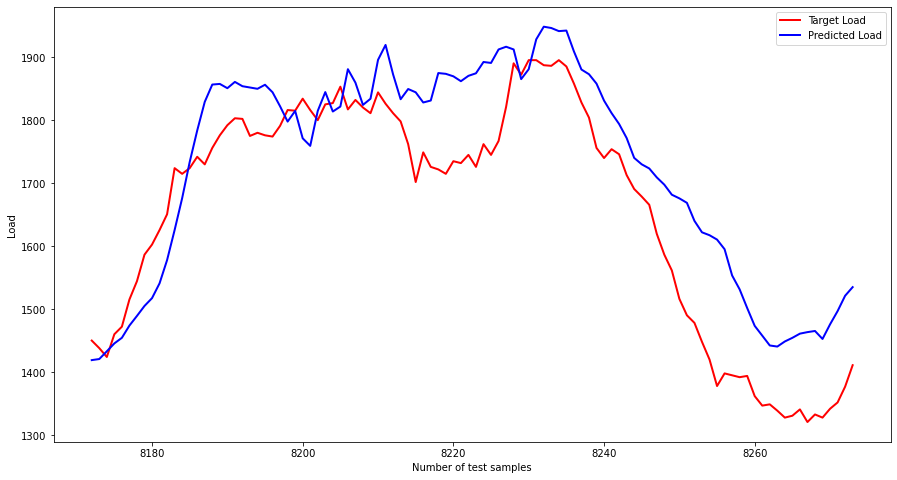

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

5.340048557228502


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -4.340038
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  144933.845611
8173  143730.067821
8174  142324.920571
8175  145935.069389
8176  147138.114500
...             ...
8269  132693.428946
8270  134096.160243
8271  135097.788710
8272  137603.949712
8273  141013.695288

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8172    963.100157
8173    299.007369
8174     80.865548
8175    211.857527
8176    312.994091
...            ...
8269  15587.247104
8270  17951.508975
8271  21015.648953
8272  20821.520671
8273  15351.665126

[102 rows x 1 columns]
y_t+100    9662.165703
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    98.296316
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1419.2832]
[1420.9968]
[1433.248]
[1445.7854]
[1454.6775]
[1474.0785]
[1489.4131]
[1505.2328]
[1517.6317]
[1541.123]
[1578.0515]
[1625.7507]
[1676.2646]
[1733.6154]
[1783.7261]
[1829.1617]
[1856.6355]
[1857.6471]
[1850.8627]
[1860.8547]
[1854.0187]
[1851.9617]
[1849.8984]
[1856.328]
[1844.3713]
[1822.097]
[1797.8538]
[1814.7991]
[1771.331]
[1759.3145]
[1814.8298]
[1844.6809]
[1813.8252]
[1821.7155]
[1881.0239]
[1859.6559]
[1824.327]
[1834.0962]
[1895.8333]
[1919.5173]
[1872.7175]
[1833.3468]
[1849.5665]
[1844.3486]
[1828.1882]
[1831.2888]
[1874.8949]
[1873.6447]
[1869.7045]
[1861.9684]
[1870.4697]
[1874.5146]
[1892.4534]
[1890.9415]
[1912.3328]
[1916.6748]
[1912.3611]
[1865.2567]
[1881.0013]
[1928.4106]
[1948.4824]
[1946.3739]
[1941.4539]
[1942.3385]
[1909.3331]
[1880.4906]
[1873.0271]
[1858.1125]
[1831.1569]
[1811.3434]
[1794.0239]
[1771.7552]
[1740.2513]
[1730.0353]
[1723.4662]
[1709.2981]
[1697.7301]
[1681.7876]
[1676.002]
[1668.9021]
[1640.2913]
[1622.1288]
[1617.5205]
[1610.5763]